In [ ]:
from torchvision import transforms
from torchvision.datasets import MNIST

train_data = MNIST('mnist_train', train=True, transform=transforms.ToTensor(), download=True)
test_data = MNIST('mnist_test', train=False, transform=transforms.ToTensor(), download=True)
print("Train data shape: {0}".format(train_data.data.shape))

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm

input_dim = (1, 28, 28)
hidden_layers = [50, 100, 500]
output_dim = 10

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

model = CharacterClassifier(input_dim, hidden_layers, output_dim)
model.train()

epochs = 5
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 300 == 0:
                print('Loss: {}'.format(loss))
            torch.save(model.state_dict(), 'cc{}.ckpt'.format(step))                
model.eval()
accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))

In [ ]:
import os
import torch
import cv2
from matplotlib import pyplot as plt
from PIL import Image

file_path = "SubImages"
raw_images = []
images = []
for file_name in os.listdir(file_path):
    img = cv2.imread(file_path+'/'+file_name)
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    raw_images.append(img)
    np_img = np.asarray(img).reshape((1, 28, 28))
    images.append(np_img)  
image_tensor = torch.Tensor(images)
prediction = model(image_tensor)
labels = torch.argmax(prediction, dim=1)

eps = 1e-08

i = 0
for label in labels: 
    plt.imshow(raw_images[i])
    plt.show()  
    print(label)  
    i+=1

In [1]:
import torch
import os
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm
from training_data import HASY
from PIL import Image
from matplotlib import pyplot as plt

hasy_train = HASY('HASY')
hasy_test = HASY('HASY', train=False)

print("Train data length: {0}".format(len(hasy_train.data)))
print("Test data length: {0}".format(len(hasy_test.data)))
print("Img Shape: {0}".format(hasy_train.data[0].shape))
print("Number of Labels: {0}".format(hasy_train.no_labels))



100%|██████████| 16992/16992 [00:00<00:00, 28246.78it/s]

Train data length: 13100
Test data length: 1488
Img Shape: torch.Size([3, 32, 32])
Number of Labels: 19


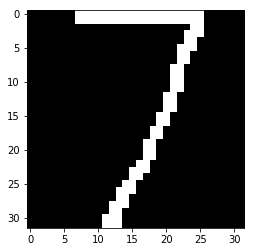

In [2]:
from torchvision import transforms
test_img = transforms.ToPILImage()(hasy_train.data[0])
plt.imshow(test_img, cmap='gray')
plt.show()

In [3]:
hasy_model = CharacterClassifier(hasy_train.img_dims, [50], hasy_train.no_labels)
hasy_model.train()

epochs = 15
optimizer = torch.optim.SGD(hasy_model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(hasy_train, batch_size=16, shuffle=True)
test_loader = DataLoader(hasy_test, batch_size=16, shuffle=False)
    
for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = hasy_model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 100 == 0:
                print('Loss: {}'.format(loss))
torch.save(hasy_model.state_dict(), 'hasy_model-02.ckpt')        
           

accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = hasy_model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))  

  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 0


  0%|          | 1/819 [00:00<07:35,  1.80it/s]

Loss: 2.9164109230041504


 12%|█▏        | 101/819 [01:10<08:11,  1.46it/s]

Loss: 2.6927103996276855


 25%|██▍       | 201/819 [02:17<06:42,  1.53it/s]

Loss: 2.7537384033203125


 37%|███▋      | 301/819 [03:29<06:04,  1.42it/s]

Loss: 2.6923820972442627


 49%|████▉     | 401/819 [04:41<04:47,  1.46it/s]

Loss: 2.5701980590820312


 61%|██████    | 501/819 [05:53<03:33,  1.49it/s]

Loss: 2.563814878463745


 73%|███████▎  | 601/819 [07:07<02:30,  1.45it/s]

Loss: 2.452441453933716


 86%|████████▌ | 701/819 [08:19<01:21,  1.45it/s]

Loss: 2.3953018188476562


 98%|█████████▊| 801/819 [09:36<00:16,  1.08it/s]

Loss: 2.387277603149414


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 1


  0%|          | 1/819 [00:00<11:28,  1.19it/s]

Loss: 2.217390775680542


 12%|█▏        | 101/819 [01:23<09:36,  1.25it/s]

Loss: 2.264857769012451


 25%|██▍       | 201/819 [02:45<08:35,  1.20it/s]

Loss: 2.305612087249756


 37%|███▋      | 301/819 [04:06<07:16,  1.19it/s]

Loss: 2.375955820083618


 49%|████▉     | 401/819 [05:27<05:46,  1.21it/s]

Loss: 2.09380841255188


 61%|██████    | 501/819 [06:48<04:22,  1.21it/s]

Loss: 2.13127064704895


 73%|███████▎  | 601/819 [08:07<03:08,  1.15it/s]

Loss: 2.2753868103027344


 86%|████████▌ | 701/819 [09:25<01:38,  1.20it/s]

Loss: 2.096278429031372


 98%|█████████▊| 801/819 [10:51<00:13,  1.34it/s]

Loss: 2.268068790435791


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 2


  0%|          | 1/819 [00:00<09:44,  1.40it/s]

Loss: 2.1345441341400146


 12%|█▏        | 101/819 [01:21<09:59,  1.20it/s]

Loss: 2.3433806896209717


 25%|██▍       | 201/819 [02:42<08:14,  1.25it/s]

Loss: 2.2380082607269287


 37%|███▋      | 301/819 [04:05<07:01,  1.23it/s]

Loss: 2.066831111907959


 49%|████▉     | 401/819 [05:26<05:30,  1.26it/s]

Loss: 2.2037980556488037


 61%|██████    | 501/819 [06:47<04:23,  1.21it/s]

Loss: 2.2148513793945312


 73%|███████▎  | 601/819 [08:09<02:55,  1.24it/s]

Loss: 2.140543222427368


 86%|████████▌ | 701/819 [09:31<01:36,  1.23it/s]

Loss: 2.370110273361206


 98%|█████████▊| 801/819 [10:48<00:12,  1.49it/s]

Loss: 2.1677703857421875


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 3


  0%|          | 1/819 [00:00<09:01,  1.51it/s]

Loss: 2.2488181591033936


 12%|█▏        | 101/819 [01:08<08:06,  1.47it/s]

Loss: 2.3232524394989014


 25%|██▍       | 201/819 [02:15<07:03,  1.46it/s]

Loss: 2.1510231494903564


 37%|███▋      | 301/819 [03:23<05:54,  1.46it/s]

Loss: 2.1221354007720947


 49%|████▉     | 401/819 [04:34<05:16,  1.32it/s]

Loss: 2.217752456665039


 61%|██████    | 501/819 [05:43<03:41,  1.44it/s]

Loss: 2.1036887168884277


 73%|███████▎  | 601/819 [07:00<02:27,  1.47it/s]

Loss: 2.084815740585327


 86%|████████▌ | 701/819 [08:08<01:18,  1.50it/s]

Loss: 2.1779208183288574


 98%|█████████▊| 801/819 [09:15<00:12,  1.48it/s]

Loss: 2.180957794189453


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 4


  0%|          | 1/819 [00:00<08:40,  1.57it/s]

Loss: 2.201545000076294


 12%|█▏        | 101/819 [01:08<08:04,  1.48it/s]

Loss: 2.221660614013672


 25%|██▍       | 201/819 [02:24<08:30,  1.21it/s]

Loss: 2.157042980194092


 37%|███▋      | 301/819 [03:47<07:04,  1.22it/s]

Loss: 2.1905598640441895


 49%|████▉     | 401/819 [05:08<05:32,  1.26it/s]

Loss: 2.248056411743164


 61%|██████    | 501/819 [06:31<04:41,  1.13it/s]

Loss: 2.2645604610443115


 73%|███████▎  | 601/819 [07:55<02:57,  1.23it/s]

Loss: 2.1349732875823975


 86%|████████▌ | 701/819 [09:18<01:32,  1.28it/s]

Loss: 2.059858798980713


 98%|█████████▊| 801/819 [10:40<00:14,  1.21it/s]

Loss: 2.1910784244537354


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 5


  0%|          | 1/819 [00:00<11:36,  1.17it/s]

Loss: 2.0619006156921387


 12%|█▏        | 101/819 [01:22<10:00,  1.19it/s]

Loss: 2.0505266189575195


 25%|██▍       | 201/819 [02:43<08:24,  1.23it/s]

Loss: 2.1315906047821045


 37%|███▋      | 301/819 [04:08<07:25,  1.16it/s]

Loss: 2.051927328109741


 49%|████▉     | 401/819 [05:30<04:53,  1.42it/s]

Loss: 2.233105421066284


 61%|██████    | 501/819 [06:45<03:50,  1.38it/s]

Loss: 2.192296028137207


 73%|███████▎  | 601/819 [08:04<02:58,  1.22it/s]

Loss: 2.175203800201416


 86%|████████▌ | 701/819 [09:27<01:47,  1.09it/s]

Loss: 2.0374011993408203


 98%|█████████▊| 801/819 [10:51<00:14,  1.20it/s]

Loss: 2.112149953842163


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 6


  0%|          | 1/819 [00:00<11:23,  1.20it/s]

Loss: 2.060844659805298


 12%|█▏        | 101/819 [01:14<08:36,  1.39it/s]

Loss: 2.1025619506835938


 25%|██▍       | 201/819 [02:28<07:33,  1.36it/s]

Loss: 2.164354085922241


 37%|███▋      | 301/819 [03:42<06:08,  1.40it/s]

Loss: 2.0513038635253906


 49%|████▉     | 401/819 [05:05<05:39,  1.23it/s]

Loss: 2.1378207206726074


 61%|██████    | 501/819 [06:27<04:23,  1.21it/s]

Loss: 2.1340973377227783


 73%|███████▎  | 601/819 [07:52<02:57,  1.23it/s]

Loss: 2.1290764808654785


 86%|████████▌ | 701/819 [09:16<01:39,  1.18it/s]

Loss: 2.073148488998413


 98%|█████████▊| 801/819 [10:36<00:15,  1.19it/s]

Loss: 2.0567245483398438


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 7


  0%|          | 1/819 [00:00<11:00,  1.24it/s]

Loss: 2.056544542312622


 12%|█▏        | 101/819 [01:25<11:58,  1.00s/it]

Loss: 2.122987747192383


 25%|██▍       | 201/819 [02:53<08:44,  1.18it/s]

Loss: 2.066354751586914


 37%|███▋      | 301/819 [04:18<07:03,  1.22it/s]

Loss: 2.0986220836639404


 49%|████▉     | 401/819 [05:42<05:55,  1.17it/s]

Loss: 2.0615592002868652


 61%|██████    | 501/819 [07:06<04:38,  1.14it/s]

Loss: 2.055232286453247


 73%|███████▎  | 601/819 [08:31<03:12,  1.13it/s]

Loss: 2.1273996829986572


 86%|████████▌ | 701/819 [09:55<01:41,  1.16it/s]

Loss: 2.053231954574585


 98%|█████████▊| 801/819 [11:22<00:14,  1.20it/s]

Loss: 2.0861246585845947


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 8


  0%|          | 1/819 [00:00<10:00,  1.36it/s]

Loss: 2.1156463623046875


 12%|█▏        | 101/819 [01:21<08:40,  1.38it/s]

Loss: 2.049669027328491


 25%|██▍       | 201/819 [02:40<08:28,  1.21it/s]

Loss: 2.0622336864471436


 37%|███▋      | 301/819 [04:05<07:01,  1.23it/s]

Loss: 2.0402374267578125


 49%|████▉     | 401/819 [05:28<05:40,  1.23it/s]

Loss: 2.106273651123047


 61%|██████    | 501/819 [06:48<05:06,  1.04it/s]

Loss: 2.173689365386963


 73%|███████▎  | 601/819 [08:12<03:07,  1.16it/s]

Loss: 2.0417134761810303


 86%|████████▌ | 701/819 [09:38<01:37,  1.21it/s]

Loss: 2.043954849243164


 98%|█████████▊| 801/819 [11:03<00:15,  1.15it/s]

Loss: 2.045767307281494


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 9


  0%|          | 1/819 [00:00<11:49,  1.15it/s]

Loss: 2.0548171997070312


 12%|█▏        | 101/819 [01:25<10:34,  1.13it/s]

Loss: 2.11523699760437


 25%|██▍       | 201/819 [02:55<08:00,  1.29it/s]

Loss: 2.166836977005005


 37%|███▋      | 301/819 [04:15<06:21,  1.36it/s]

Loss: 2.140158176422119


 49%|████▉     | 401/819 [05:54<06:39,  1.05it/s]

Loss: 2.0739197731018066


 61%|██████    | 501/819 [07:20<04:04,  1.30it/s]

Loss: 2.0383708477020264


 73%|███████▎  | 601/819 [08:40<02:48,  1.29it/s]

Loss: 2.101891040802002


 86%|████████▌ | 701/819 [09:56<01:31,  1.29it/s]

Loss: 2.052919387817383


 98%|█████████▊| 801/819 [11:12<00:13,  1.30it/s]

Loss: 2.130445718765259


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 10


  0%|          | 1/819 [00:00<09:08,  1.49it/s]

Loss: 2.106893539428711


 12%|█▏        | 101/819 [01:13<08:29,  1.41it/s]

Loss: 2.103482246398926


 25%|██▍       | 201/819 [02:26<07:22,  1.40it/s]

Loss: 2.1538913249969482


 37%|███▋      | 301/819 [03:39<06:22,  1.36it/s]

Loss: 2.0483338832855225


 49%|████▉     | 401/819 [04:51<04:56,  1.41it/s]

Loss: 2.03629732131958


 61%|██████    | 501/819 [06:00<03:45,  1.41it/s]

Loss: 2.0525825023651123


 73%|███████▎  | 601/819 [07:07<02:23,  1.52it/s]

Loss: 2.0515084266662598


 86%|████████▌ | 701/819 [08:14<01:20,  1.47it/s]

Loss: 2.037940740585327


 98%|█████████▊| 801/819 [09:21<00:12,  1.47it/s]

Loss: 2.0609517097473145


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 11


  0%|          | 1/819 [00:00<09:42,  1.40it/s]

Loss: 2.0396876335144043


 12%|█▏        | 101/819 [06:21<09:03,  1.32it/s]  

Loss: 2.0758183002471924


 25%|██▍       | 201/819 [07:32<07:05,  1.45it/s]

Loss: 2.0401484966278076


 37%|███▋      | 301/819 [08:43<06:08,  1.40it/s]

Loss: 2.036726236343384


 49%|████▉     | 401/819 [09:53<04:56,  1.41it/s]

Loss: 2.041125535964966


 61%|██████    | 501/819 [11:04<03:42,  1.43it/s]

Loss: 2.2174439430236816


 73%|███████▎  | 601/819 [12:13<02:25,  1.50it/s]

Loss: 2.167356252670288


 86%|████████▌ | 701/819 [13:20<01:18,  1.50it/s]

Loss: 2.165895938873291


 98%|█████████▊| 801/819 [14:26<00:11,  1.50it/s]

Loss: 2.038703680038452


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 12


  0%|          | 1/819 [00:00<09:33,  1.43it/s]

Loss: 2.0625052452087402


 12%|█▏        | 101/819 [01:07<07:56,  1.51it/s]

Loss: 2.117293357849121


 25%|██▍       | 201/819 [25:29<08:28,  1.21it/s]    

Loss: 2.0410521030426025


 37%|███▋      | 301/819 [26:59<07:32,  1.14it/s]

Loss: 2.0428466796875


 49%|████▉     | 401/819 [28:13<04:41,  1.49it/s]

Loss: 2.0421831607818604


 61%|██████    | 501/819 [29:21<03:40,  1.44it/s]

Loss: 2.0571072101593018


 73%|███████▎  | 601/819 [30:29<02:30,  1.45it/s]

Loss: 2.0977821350097656


 86%|████████▌ | 701/819 [31:39<01:22,  1.43it/s]

Loss: 2.0457916259765625


 98%|█████████▊| 801/819 [32:51<00:12,  1.43it/s]

Loss: 2.0327486991882324


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 13


  0%|          | 1/819 [00:00<09:28,  1.44it/s]

Loss: 2.0499725341796875


 12%|█▏        | 101/819 [01:14<08:10,  1.46it/s]

Loss: 2.0428857803344727


 25%|██▍       | 201/819 [02:31<09:50,  1.05it/s]

Loss: 2.033141851425171


 37%|███▋      | 301/819 [03:48<06:37,  1.30it/s]

Loss: 2.0527384281158447


 49%|████▉     | 401/819 [05:02<05:16,  1.32it/s]

Loss: 2.044140100479126


 61%|██████    | 501/819 [06:16<05:14,  1.01it/s]

Loss: 2.0322530269622803


 73%|███████▎  | 601/819 [07:30<02:33,  1.42it/s]

Loss: 2.0366506576538086


 86%|████████▌ | 701/819 [08:43<01:26,  1.36it/s]

Loss: 2.0495402812957764


 98%|█████████▊| 801/819 [10:00<00:13,  1.37it/s]

Loss: 2.095113754272461


  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 14


  0%|          | 1/819 [00:00<09:44,  1.40it/s]

Loss: 2.0523414611816406


 12%|█▏        | 101/819 [01:13<08:52,  1.35it/s]

Loss: 2.1058387756347656


 25%|██▍       | 201/819 [02:30<07:19,  1.41it/s]

Loss: 2.042858362197876


 37%|███▋      | 301/819 [03:43<06:09,  1.40it/s]

Loss: 2.042954921722412


 49%|████▉     | 401/819 [04:54<05:00,  1.39it/s]

Loss: 2.0369300842285156


 61%|██████    | 501/819 [06:07<04:49,  1.10it/s]

Loss: 2.0328238010406494


 73%|███████▎  | 601/819 [07:18<02:28,  1.47it/s]

Loss: 2.0477001667022705


 86%|████████▌ | 701/819 [08:25<01:20,  1.47it/s]

Loss: 2.0338966846466064


 98%|█████████▊| 801/819 [09:34<00:11,  1.52it/s]

Loss: 2.1053690910339355


Test: 100%|██████████| 93/93 [00:15<00:00,  6.17it/s]

Accuracy: 89.78494262695312


In [4]:
from training_data import SegmentedImgs
# Training Iteration with our images
hasy_model = CharacterClassifier(hasy_train.img_dims, [50], hasy_train.no_labels)
own_imgs = SegmentedImgs('segmented_training_imgs')

print("Train data length: {0}".format(len(own_imgs.data)))
print("Img Shape: {0}".format(own_imgs.data[0].shape))
print("Number of Labels: {0}".format(own_imgs.no_labels))

img_loader = DataLoader(own_imgs, batch_size=16, shuffle=True)
hasy_model.load_state_dict(torch.load('hasy_model-02.ckpt'))
epochs = 15
optimizer = torch.optim.SGD(hasy_model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
    print("Epoch {0}".format(epoch))
    for step, [x_train, y_train] in enumerate(tqdm(img_loader)):
        optimizer.zero_grad()
        train_pred = hasy_model(x_train)
        loss = criterion(train_pred, y_train)
        loss.backward()
        optimizer.step()
        if step % 100 == 0:
            print('Loss: {}'.format(loss))
torch.save(hasy_model.state_dict(), 'hasy_model-trans.ckpt')  

  0%|          | 0/6 [00:00<?, ?it/s]

Train data length: 84
Img Shape: torch.Size([1, 32, 32])
Number of Labels: 19
Epoch 0


 17%|█▋        | 1/6 [00:00<00:03,  1.26it/s]

Loss: 3.0495002269744873


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 1


 17%|█▋        | 1/6 [00:00<00:02,  1.67it/s]

Loss: 2.8224711418151855


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 2


 17%|█▋        | 1/6 [00:00<00:03,  1.44it/s]

Loss: 3.0666348934173584


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 3


 17%|█▋        | 1/6 [00:00<00:03,  1.27it/s]

Loss: 2.92404842376709


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 4


 17%|█▋        | 1/6 [00:00<00:04,  1.01it/s]

Loss: 2.7648515701293945


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 5


 17%|█▋        | 1/6 [00:01<00:06,  1.37s/it]

Loss: 2.942873477935791


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 6


 17%|█▋        | 1/6 [00:01<00:07,  1.40s/it]

Loss: 2.9856913089752197


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 7


 17%|█▋        | 1/6 [00:02<00:13,  2.79s/it]

Loss: 2.802997589111328


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 8


 17%|█▋        | 1/6 [00:03<00:19,  3.95s/it]

Loss: 2.9282031059265137


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 9


 17%|█▋        | 1/6 [00:04<00:21,  4.36s/it]

Loss: 2.8700692653656006


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 10


 17%|█▋        | 1/6 [00:07<00:39,  8.00s/it]

Loss: 2.869978189468384


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 11


 17%|█▋        | 1/6 [00:04<00:20,  4.18s/it]

Loss: 2.9367105960845947


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 12


 17%|█▋        | 1/6 [00:09<00:45,  9.07s/it]

Loss: 2.9946277141571045


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 13


 17%|█▋        | 1/6 [00:02<00:14,  2.99s/it]

Loss: 2.8028035163879395


  0%|          | 0/6 [00:00<?, ?it/s]

Epoch 14


 17%|█▋        | 1/6 [00:05<00:26,  5.33s/it]

Loss: 2.74922776222229


100%|██████████| 6/6 [00:29<00:00,  4.37s/it]


In [ ]:
# Train with a pretrained model from PyTorch
from torchvision import models

torch_model = models.densenet121(pretrained=False, num_classes=19)
epochs = 10
optimizer = torch.optim.SGD(torch_model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(hasy_train, batch_size=16, shuffle=True)
test_loader = DataLoader(hasy_test, batch_size=16, shuffle=False)

for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = torch_model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 100 == 0:
                print('Loss: {}'.format(loss))
torch.save(hasy_model.state_dict(), 'pretrained-model.ckpt')

accuracies = []
for idx, [x_test, y_test] in enumerate(tqdm(test_loader, desc='Test')):
    test_pred = torch_model(x_test)
    accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
    accuracies.append(accuracy)
print("Accuracy: {0}".format(np.mean(accuracies)))  

  0%|          | 0/819 [00:00<?, ?it/s]

Epoch 0


  0%|          | 1/819 [00:00<06:45,  2.02it/s]

Loss: 2.9542460441589355


 12%|█▏        | 101/819 [01:03<06:34,  1.82it/s]

Loss: 1.3055071830749512


 25%|██▍       | 201/819 [02:03<06:32,  1.58it/s]

Loss: 1.2559380531311035


 36%|███▌      | 293/819 [02:58<04:54,  1.79it/s]